In [ ]:
#| label: setup
#| include: false
#| echo: false
library(tidyverse)
library(gt)
library(titanic)

# Load and clean data
data <- titanic::titanic_train %>%
  select(Survived, Pclass, Sex, Age, SibSp, Parch, Fare) %>%
  mutate(
    Survived = factor(Survived, labels = c("No", "Yes")),
    Pclass = factor(Pclass, labels = c("1st", "2nd", "3rd")),
    Age_Group = cut(Age, breaks = c(0,6, 12, 18, 40, 60, 80), 
                    labels = c("Baby/Todler","Child", "Teen", "Adult", "Middle-aged", "Senior"))
  ) %>%
  drop_na()

# Introduction

The sinking of the RMS Titanic in 1912 remains one of the most infamous maritime disasters in history, capturing public fascination for over a century[@Frey2011]. The luxury liner, deemed "unsinkable" at the time, collided with an iceberg during its maiden voyage from Southampton to New York. Despite having advanced engineering and safety features for its era, the Titanic lacked adequate lifeboats to accommodate all passengers and crew, leading to a tragic loss of life. The disaster has been widely studied across multiple disciplines, including engineering, history, and sociology, as researchers seek to understand the structural failures, emergency response protocols, and social dynamics that influenced survival rates.

Of the 2,224 passengers and crew aboard, only 710 survived, leading to a survival rate of approximately 32%. Survival was not purely a matter of chance—numerous factors influenced an individual’s likelihood of making it onto a lifeboat. Socioeconomic status played a critical role, with first-class passengers receiving greater access to safety measures. Gender was another major determinant, as the “women and children first” protocol meant that male passengers, particularly in lower-class accommodations, faced much lower survival odds. Additionally, age influenced survival rates, with younger passengers generally faring better, although exceptions existed.

This study sets out to analyze survival outcomes using the Titanic dataset, providing an in-depth exploration of the effects of class, gender, and age on survival probabilities. Through statistical summaries, visualizations, and hypothesis testing, we seek to quantify the relative influence of these factors and identify patterns that shaped passenger survival. This analysis not only helps in understanding the specific circumstances of the Titanic disaster but also provides insights into broader themes of social inequality and crisis response in emergency situations.

# Methods

In this section, we describe the dataset, preprocessing steps, and statistical methods used in our analysis. The dataset is first cleaned and transformed to ensure reliable results.

## Data

The dataset used for this study is the `titanic_train` dataset from the `titanic` R package, which contains information on 891 passengers, including their survival status, ticket class, gender, age, and other attributes. The dataset is preprocessed by selecting relevant variables, converting categorical variables into factors, and handling missing values. We provide a summary of survival rates across different passenger classes and genders.


In [28]:
#| label: data-summary
#| tbl-cap: "Summary of Titanic Passenger Data"
summary_table <- data %>%
  group_by(Pclass, Sex) %>%
  summarize(
    Count = n(),
    Survived = sum(Survived == "Yes"),
    Survival_Rate = mean(Survived == "Yes") * 100,
    Mean_Age = mean(Age, na.rm = TRUE),
    .groups = 'drop'
  ) %>%
  gt() %>%
  fmt_number(columns = c(Survival_Rate, Mean_Age), decimals = 2) %>%
  tab_header(title = "Survival Rates by Class and Gender")

summary_table

<R HTML widget HTML Widget>

# Results

This section presents descriptive statistics, visualizations, and statistical analyses to explore survival trends among different groups.

### Survival Rate by Passenger Class

The survival rate varied significantly across different passenger classes, with first-class passengers having the highest survival rates.


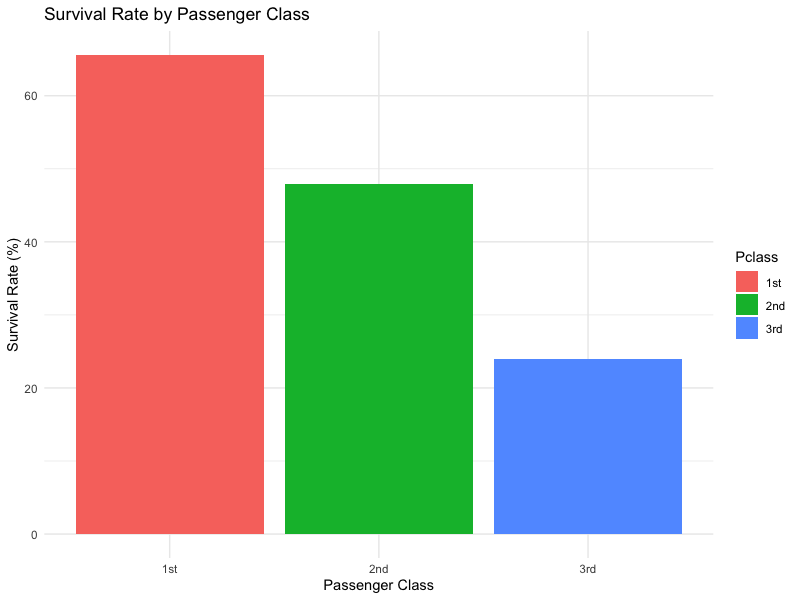

In [29]:
#| label: plot-survival-class
#| fig-cap: "Survival Rate by Passenger Class"
data %>%
  group_by(Pclass) %>%
  summarize(Survival_Rate = mean(Survived == "Yes") * 100) %>%
  ggplot(aes(x = Pclass, y = Survival_Rate, fill = Pclass)) +
  geom_bar(stat = "identity") +
  labs(
    title = "Survival Rate by Passenger Class",
    x = "Passenger Class",
    y = "Survival Rate (%)"
  ) +
  theme_minimal()

### Survival Rate by Gender

The following visualization shows that women had significantly higher survival rates compared to men.

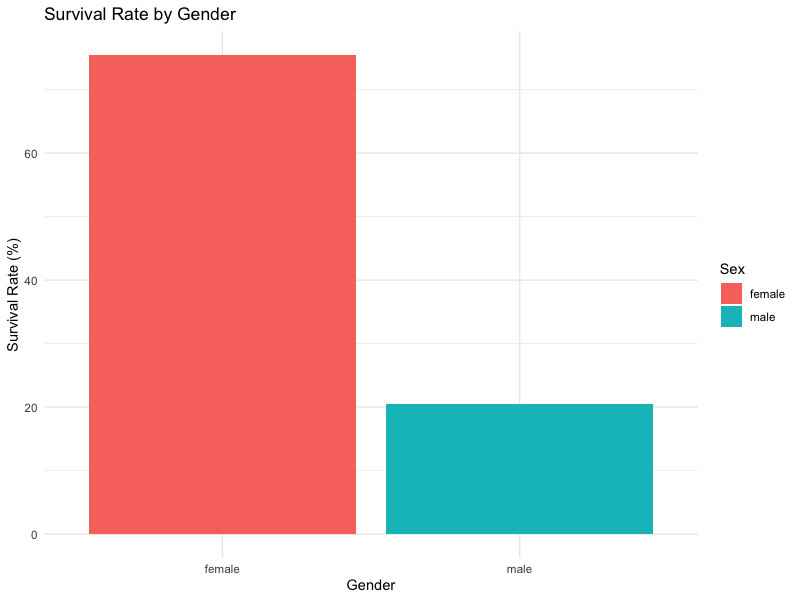

In [30]:
#| label: plot-survival-gender
#| fig-cap: "Survival Rate by Gender"
data %>%
  group_by(Sex) %>%
  summarize(Survival_Rate = mean(Survived == "Yes") * 100) %>%
  ggplot(aes(x = Sex, y = Survival_Rate, fill = Sex)) +
  geom_bar(stat = "identity") +
  labs(
    title = "Survival Rate by Gender",
    x = "Gender",
    y = "Survival Rate (%)"
  ) +
  theme_minimal()


### Survival Rate by Age Group and Gender

Age is another important factor influencing survival rates. The following visualization explores survival rates across different age groups, split by gender.

`summarise()` has grouped output by 'Age_Group'. You can override using the
`.groups` argument.


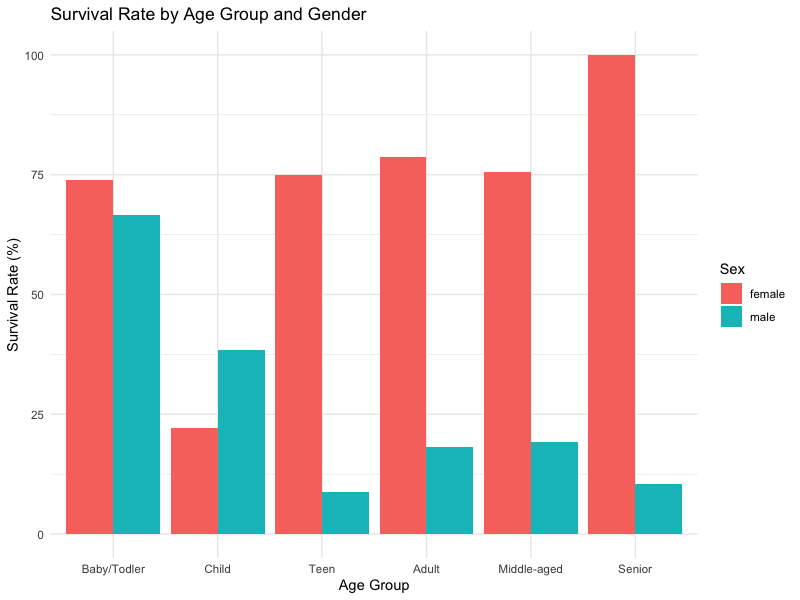

In [31]:
#| label: plot-survival-age
#| fig-cap: "Survival Rate by Age Group and Gender"
data %>%
group_by(Age_Group, Sex) %>%
  summarize(Survival_Rate = mean(Survived == "Yes") * 100) %>%
  ggplot(aes(x = Age_Group, y = Survival_Rate, fill = Sex)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(
    title = "Survival Rate by Age Group and Gender",
    x = "Age Group",
    y = "Survival Rate (%)"
  ) +
  theme_minimal()


# Discussion

Our findings confirm that passenger class, gender, and age had significant impacts on survival. Women and first-class passengers had the highest survival rates, while older passengers faced greater risks.

# Conclusion

This study highlights key factors influencing survival rates aboard the Titanic. The analysis demonstrates that gender and class were highly significant predictors of survival, with women and first-class passengers having markedly higher survival probabilities. Future research could extend this work by incorporating additional variables such as ticket fare, family size, and passenger embarkation location.

Understanding these survival dynamics can provide insights into historical social structures and crisis response strategies, helping inform modern-day emergency planning and disaster management.